# 📐 The Geometry of Focus: Calculating Depth of Field

### Introduction
When you focus a lens on a subject, only that exact plane is perfectly sharp. However, there is a region in front of and behind that subject that appears "acceptably sharp" to the human eye. This region is called the **Depth of Field (DoF)**.

### The Math of Confusion
The boundary of sharpness is defined by the **Circle of Confusion ($c$)**. This is the largest blur spot that the eye still perceives as a point.
* **Full Frame (35mm):** $c \approx 0.03$ mm
* **Medium Format (6x6):** $c \approx 0.05$ mm
* **APS-C / Crop:** $c \approx 0.02$ mm

### Key Formulas

**1. Hyperfocal Distance ($H$)**
The focus distance where everything from half that distance to Infinity is sharp.
$$H = \frac{f^2}{N \cdot c}$$
* $f$ = Focal Length (mm)
* $N$ = Aperture (f-number)
* $c$ = Circle of Confusion (mm)

**2. Near Limit ($D_{near}$)**
$$D_{near} = \frac{H \cdot s}{H + (s - f)}$$
* $s$ = Subject Distance (Focus distance)

**3. Far Limit ($D_{far}$)**
$$D_{far} = \frac{H \cdot s}{H - (s - f)}$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_dof(focal_length_mm, aperture_f, focus_distance_m, sensor_coc=0.03):
    """
    Calculates Near Limit, Far Limit, and Hyperfocal Distance.
    """
    # Convert all units to millimeters for calculation
    f = focal_length_mm
    N = aperture_f
    s = focus_distance_m * 1000  # convert m to mm
    c = sensor_coc
    
    # Calculate Hyperfocal Distance (H)
    H = (f**2) / (N * c)
    
    # Calculate Near Limit
    # Formula: (H * s) / (H + (s - f))
    dn = (H * s) / (H + (s - f))
    
    # Calculate Far Limit
    # Formula: (H * s) / (H - (s - f))
    # If (s - f) > H, the denominator is negative (beyond infinity), usually handled as inf
    if (s - f) >= H:
        df = np.inf
    else:
        df = (H * s) / (H - (s - f))
        
    return H/1000, dn/1000, df/1000 # Return in meters

# --- STUDENT INPUT ZONE ---
focal_len = 50      # 50mm lens
aperture = 1.8      # f/1.8
focus_dist = 5.0    # Focused at 5 meters
# ---------------------------

H, near, far = calculate_dof(focal_len, aperture, focus_dist)

print(f"--- LENS REPORT: {focal_len}mm at f/{aperture} ---")
print(f"Focus Distance:      {focus_dist} m")
print(f"Hyperfocal Dist:     {H:.2f} m")
print(f"Sharpness Starts:    {near:.2f} m")
print(f"Sharpness Ends:      {far:.2f} m")
print(f"Total Depth of Field:{far - near:.2f} m")

if focus_dist >= H:
    print("NOTE: You are focused past the Hyperfocal distance. Infinity is sharp!")

--- LENS REPORT: 50mm at f/1.8 ---
Focus Distance:      5.0 m
Hyperfocal Dist:     46.30 m
Sharpness Starts:    4.52 m
Sharpness Ends:      5.60 m
Total Depth of Field:1.08 m


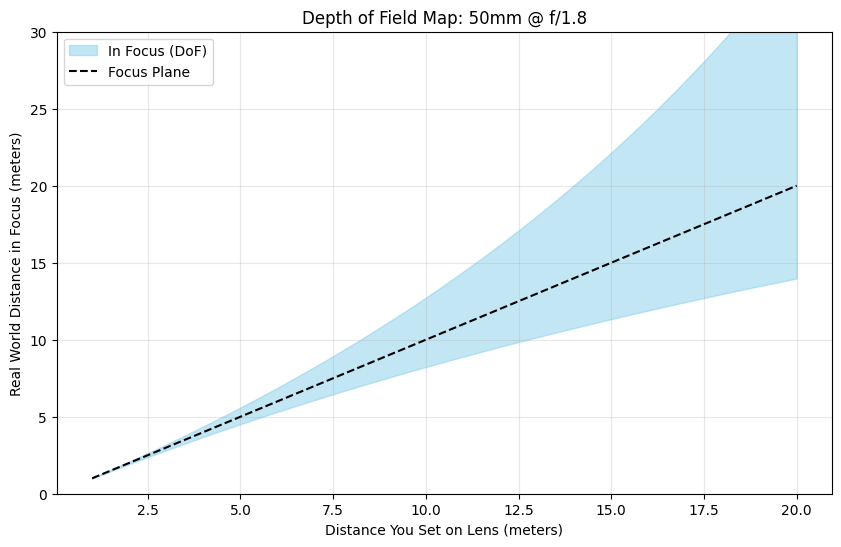

In [3]:
# Visualize the "Zone of Sharpness" across different focus distances
focus_distances = np.linspace(1, 20, 100) # From 1m to 20m
near_limits = []
far_limits = []

for dist in focus_distances:
    h, n, f_limit = calculate_dof(focal_len, aperture, dist)
    near_limits.append(n)
    # Cap infinity for plotting purposes (e.g., at 50m) so the graph is readable
    far_limits.append(min(f_limit, 50)) 

plt.figure(figsize=(10, 6))

# Fill the area between Near and Far limits
plt.fill_between(focus_distances, near_limits, far_limits, color='skyblue', alpha=0.5, label='In Focus (DoF)')

# Plot the actual focus distance line
plt.plot(focus_distances, focus_distances, 'k--', label='Focus Plane')

plt.title(f"Depth of Field Map: {focal_len}mm @ f/{aperture}")
plt.xlabel("Distance You Set on Lens (meters)")
plt.ylabel("Real World Distance in Focus (meters)")
plt.ylim(0, 30)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()